In [1]:
!pip install pycaret


In [2]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install pycaret
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt


In [3]:
# Load dataset from seaborn library
data = sns.load_dataset('titanic')

# Display first rows
data.head()

# Handle missing values and select useful columns
data = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

# Verify dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [4]:
# Corrected PyCaret setup (replace silent=True with verbose=False)
clf = setup(data=data,
            target='survived',
            session_id=42,
            normalize=True,
            fix_imbalance=True,
            verbose=False)


In [5]:
# Compare multiple models and select the best one
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8131,0.8529,0.7360,0.7924,0.7575,0.6065,0.6126,0.3060
rf,Random Forest Classifier,0.8111,0.8530,0.7310,0.7919,0.7497,0.6002,0.6092,0.2760
xgboost,Extreme Gradient Boosting,0.8091,0.8388,0.7310,0.7871,0.7516,0.5977,0.6045,0.1270
gbc,Gradient Boosting Classifier,0.8070,0.8601,0.7310,0.7818,0.7486,0.5933,0.6003,0.2740
knn,K Neighbors Classifier,0.8051,0.8395,0.7557,0.7597,0.7548,0.5933,0.5965,0.0920
et,Extra Trees Classifier,0.7949,0.8465,0.7162,0.7584,0.7308,0.5667,0.5721,0.2320
dt,Decision Tree Classifier,0.7891,0.7800,0.7360,0.7406,0.7341,0.5599,0.5640,0.1210
ridge,Ridge Classifier,0.7890,0.8522,0.7412,0.7406,0.7376,0.5616,0.5649,0.0740
lda,Linear Discriminant Analysis,0.7890,0.8519,0.7412,0.7406,0.7376,0.5616,0.5649,0.1010
lr,Logistic Regression,0.7829,0.8516,0.7462,0.7267,0.7331,0.5507,0.5542,0.6770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
best_model = compare_models()
final_model = finalize_model(best_model)  # ✅ Pass the best_model here


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8131,0.8529,0.7360,0.7924,0.7575,0.6065,0.6126,0.4680
rf,Random Forest Classifier,0.8111,0.8530,0.7310,0.7919,0.7497,0.6002,0.6092,0.2520
xgboost,Extreme Gradient Boosting,0.8091,0.8388,0.7310,0.7871,0.7516,0.5977,0.6045,0.1220
gbc,Gradient Boosting Classifier,0.8070,0.8601,0.7310,0.7818,0.7486,0.5933,0.6003,0.2960
knn,K Neighbors Classifier,0.8051,0.8395,0.7557,0.7597,0.7548,0.5933,0.5965,0.2190
et,Extra Trees Classifier,0.7949,0.8465,0.7162,0.7584,0.7308,0.5667,0.5721,0.2180
dt,Decision Tree Classifier,0.7891,0.7800,0.7360,0.7406,0.7341,0.5599,0.5640,0.0770
ridge,Ridge Classifier,0.7890,0.8522,0.7412,0.7406,0.7376,0.5616,0.5649,0.0760
lda,Linear Discriminant Analysis,0.7890,0.8519,0.7412,0.7406,0.7376,0.5616,0.5649,0.0750
lr,Logistic Regression,0.7829,0.8516,0.7462,0.7267,0.7331,0.5507,0.5542,0.1600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [6]:
predictions = predict_model(best_model, raw_score=True)

# Verify columns
print(predictions.columns)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7710,0.8520,0.6667,0.7436,0.7030,0.5176,0.5197


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived', 'prediction_label', 'prediction_score_0',
       'prediction_score_1'],
      dtype='object')


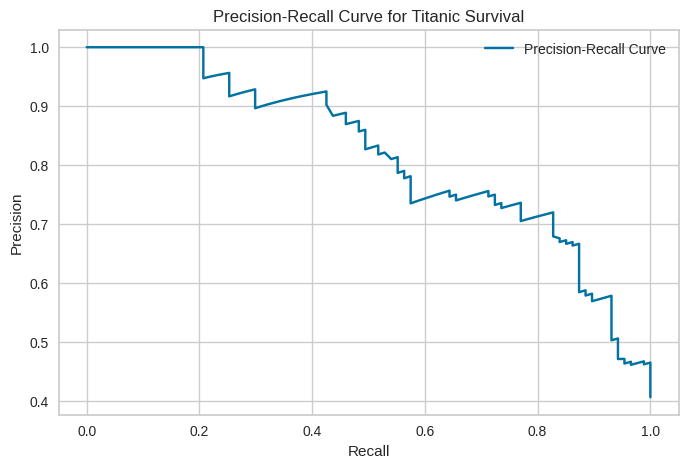

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       127
           1       0.74      0.57      0.65        87

    accuracy                           0.74       214
   macro avg       0.74      0.72      0.72       214
weighted avg       0.74      0.74      0.74       214



In [8]:
score_col = 'prediction_score_1'
precision, recall, thresholds = precision_recall_curve(predictions['survived'], predictions[score_col])

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Titanic Survival')
plt.grid(True)
plt.legend()
plt.show()

threshold = 0.6
predictions['predicted_label'] = predictions[score_col].apply(lambda x: 1 if x >= threshold else 0)

print(classification_report(predictions['survived'], predictions['predicted_label']))


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9537,0.9945,0.9097,0.9740,0.9408,0.9028,0.9042


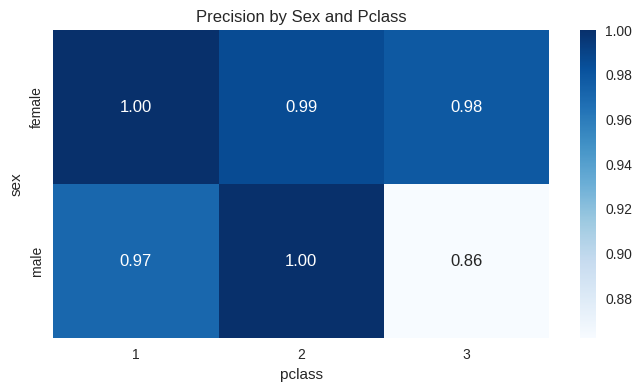

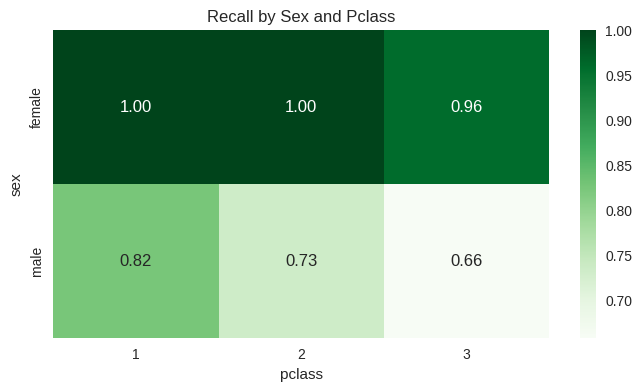

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Use predictions + original data
predictions = predict_model(final_model, data=data)

# Merge predicted labels with original columns (Sex, Pclass)
merged = data.copy()
merged['Predicted'] = predictions['prediction_label']  # Or use 'Prediction_Label' if that's the output
merged['Actual'] = get_config('y_train')  # Actual labels if needed

# Group by Sex and Pclass
grouped_metrics = []

for sex in merged['sex'].unique():
    for pclass in merged['pclass'].unique():
        subgroup = merged[(merged['sex'] == sex) & (merged['pclass'] == pclass)]
        if len(subgroup) > 0:
            precision = precision_score(subgroup['survived'], subgroup['Predicted'])
            recall = recall_score(subgroup['survived'], subgroup['Predicted'])
            grouped_metrics.append({'sex': sex, 'pclass': pclass, 'Precision': precision, 'Recall': recall})

# Create DataFrame
group_df = pd.DataFrame(grouped_metrics)

# Pivot for heatmap
pivot_precision = group_df.pivot(index='sex', columns='pclass', values='Precision')
pivot_recall = group_df.pivot(index='sex', columns='pclass', values='Recall')

# Plot Precision Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(pivot_precision, annot=True, cmap='Blues', fmt=".2f")
plt.title('Precision by Sex and Pclass')
plt.show()

# Plot Recall Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(pivot_recall, annot=True, cmap='Greens', fmt=".2f")
plt.title('Recall by Sex and Pclass')
plt.show()


In [15]:
# Check column names to debug if needed
print("Prediction Columns:", predictions.columns)

Prediction Columns: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived', 'prediction_label', 'prediction_score'],
      dtype='object')
